In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2021-12-28 10:24:08.557292: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-28 10:24:08.557319: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(x_train, y_train), (x_test,y_test) = datasets.mnist.load_data()
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [3]:
import pandas as pd
pd.DataFrame(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [4]:
# Normalizing training data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [20]:
cnn=models.Sequential([

#cnn
layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
layers.MaxPooling2D((2,2)),

layers.Conv2D(64,(3,3),activation="relu"),
layers.MaxPooling2D((2,2)),
#dense_layer
layers.Flatten(),
layers.Dense(64,activation="relu"),
layers.Dense(10,activation="softmax")
]
)

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(x_train, y_train, epochs=5,verbose=True)

2021-12-28 10:30:12.604076: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 27s 13ms/step - loss: 0.1348 - accuracy: 0.9589
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0448 - accuracy: 0.9864
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0314 - accuracy: 0.9903
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0224 - accuracy: 0.9928
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0176 - accuracy: 0.9943


In [36]:
pred = cnn.predict(x_test)

In [37]:
pred

array([[1.1225714e-09, 9.7701287e-09, 9.9293445e-09, ..., 9.9999344e-01,
        6.9793965e-10, 6.1144897e-06],
       [1.2130793e-06, 2.3125244e-06, 9.9999630e-01, ..., 4.6289753e-11,
        1.3751409e-07, 4.3583016e-11],
       [6.5377526e-07, 9.9994385e-01, 2.0453356e-06, ..., 1.9086481e-05,
        1.2481161e-05, 5.0683428e-07],
       ...,
       [5.5740816e-12, 2.8783456e-09, 3.2989267e-12, ..., 2.1922653e-10,
        1.9839108e-07, 9.3958459e-09],
       [4.2831994e-06, 1.6772209e-08, 6.1315736e-10, ..., 6.4403891e-09,
        1.0863382e-03, 7.4767314e-08],
       [5.8253420e-08, 3.5217035e-08, 1.0414317e-06, ..., 2.6398344e-11,
        5.6517024e-06, 2.5760738e-10]], dtype=float32)

In [42]:
pred = [np.argmax(i) for i in pred]

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [44]:
accuracy_score(y_test,pred)

0.9896

<AxesSubplot:>

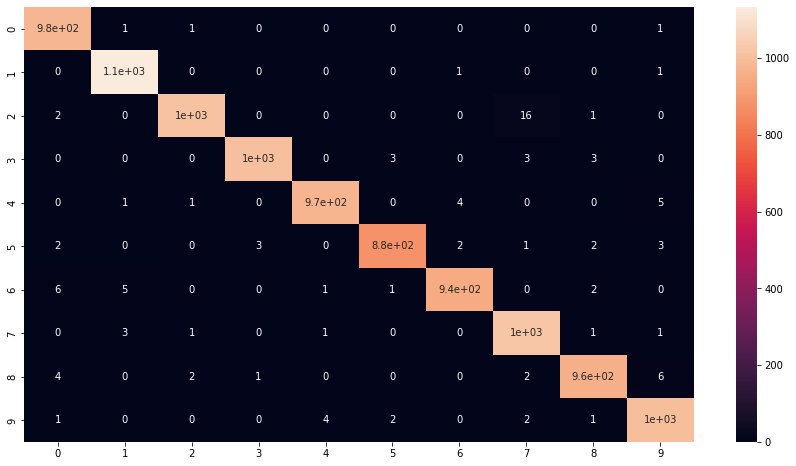

In [46]:
import seaborn as sns
c = confusion_matrix(y_test,pred)
plt.figure(figsize=(15,8))
sns.heatmap(c, annot=True)

7


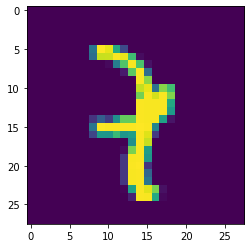

In [49]:
plt.imshow(x_test[551])
print(pred[551])

4


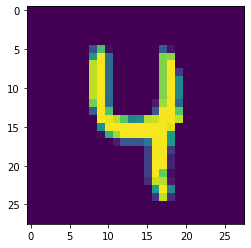

In [51]:
plt.imshow(x_test[1542])
print(pred[1542])

9


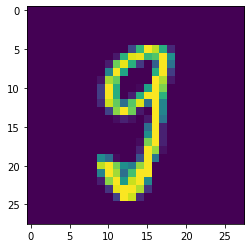

In [52]:
plt.imshow(x_test[1952])
print(pred[1952])